# Assignment 5: Classification

This assignment covers **Chapters 17-18** from the textbook as well as lecture material from Weeks 12-13. Please complete this assignment by providing answers in cells after the question. Use **Code** cells to write and run any code you need to answer the question and **Markdown** cells to write out answers in words. After you are finished with the assignment, remember to download it as an **HTML file** and submit it in **ELMS**  by the specified due date.

In [16]:
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score

### Question 1: Predicting Baby Low Birthweight Status

In this question, we will use machine learning to try to predict whether a baby will have low birthweight status. To do this, we will use the `ncbirths` dataset.

In [17]:
ncbirths = Table.read_table('ncbirths.csv')

In [18]:
ncbirths.show(3)

mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
13,younger mom,39,full term,10,married,38,7.63,not low,male,nonsmoker,not white
14,younger mom,42,full term,15,married,20,7.88,not low,male,nonsmoker,not white
15,younger mom,37,full term,11,married,38,6.63,not low,female,nonsmoker,white


We will try to use all of the variables provided in this dataset (besides `weight`) to try to predict the outcome, `lowbirthweight`.

**a)** Clean the dataset by changing any categorical variables into dummy variables with 0 and 1 values. Assign the cleaned dataset to the name `ncbirths_clean`. 

In [19]:
ncbirths_dummy = ncbirths.with_columns('premature', ncbirths.column('premie') == 'premie', # True if premature, False if not
                                       'female', ncbirths.column('gender') == 'female', # True if female, False if not
                                       'smoker', ncbirths.column('habit') == 'smoker', # True if smoker, False if not
                                       'lowweight', ncbirths.column('lowbirthweight') == 'low',# Our outcome. True if low birthweight, False if not
                                       'white', ncbirths.column('whitemom') == 'white',
                                       'youngmom', ncbirths.column('mature') == 'younger mom',
                                       'married', ncbirths.column('marital') == 'married') 


ncbirths_clean = ncbirths_dummy.drop('weight','premie', 'gender', 'habit', 'lowbirthweight', 'whitemom', 'mature', 'marital')

**b)** Create two Tables, one called `test` and one called `train`. The `test` table should contain a random 20% of the data, while the `train` Table should contain the other 80%.

In [20]:
# shuffle dataset to randomize
shuffled_births = ncbirths_clean.sample(with_replacement = False)

# prep train/test sets
nrows = ncbirths.num_rows
ntrain = int(nrows*.8) 

# create train/test sets
train = shuffled_births.take(np.arange(ntrain))
test = shuffled_births.take(np.arange(ntrain,nrows))

**c)** Fit a K-Nearest Neighbors model using k = 5, 9, 15, 19, and 25. Find the predicted scores for the test for each of these and use a threshold score of 0.1, 0.3, 0.5, 0.7, and 0.9 to find the accuracy on the test for all of these models. You should end up with a Table that has every combination of the above k and threshold values, and the accuracy associated with that combination. Which model and threshold performed the best?

**Hint:** You can use a loop within a loop instead of manually trying all of the k values and threshold values. Loop through an array of k values and as well as an array of threshold values. You should have an accuracy for each combination of k and threshold values at the end.  

In [21]:
# create empty arrays to store values
threshold_values = make_array() # for thresholds
k_values = make_array() # for Ks
knn_accuracy = make_array() # for accuracies

# create nested loops to cycle through different combinations of K and t
for k in make_array(5,9,15,19,25):
    for t in make_array(0.1,0.3,0.5,0.7,0.9): 
        # create model object
        knn = KNeighborsClassifier(n_neighbors=k)
        
        # prep the variables
        predictors = ncbirths_clean.drop('lowweight').rows
        outcome = ncbirths_clean.column('lowweight')
        
        # fit the model
        knn.fit(X= predictors, y= outcome) 
        
        # generate predictions
        pred = knn.predict_proba(test.drop("lowweight").rows)[:,1] > t
    
        # assemble results
        k_values = np.append(k_values,k)
        threshold_values = np.append(threshold_values, t)
        knn_accuracy = np.append(knn_accuracy, accuracy_score(test.column("lowweight"), pred))
        

# put results in Table for visualization
knn_results = Table().with_columns("K", k_values, 
                                   "Thresholds", threshold_values,
                                   "Accuracy Score", knn_accuracy)
# sort by accuracy to look at results
knn_results.sort("Accuracy Score", descending= True)
# create scatterplot
knn_results.scatter("K","Accuracy Score", group="Thresholds")

In [22]:
knn_results = Table().with_columns("K", k_values, 
                                   "Thresholds", threshold_values,
                                   "Accuracy Score", knn_accuracy)

knn_results.sort("Accuracy Score", descending= True)

knn_results.scatter("K","Accuracy Score", group="Thresholds")

K,Thresholds,Accuracy Score
9,0.3,0.932642
5,0.3,0.927461
15,0.3,0.92228
9,0.5,0.911917
19,0.3,0.911917
5,0.5,0.906736
25,0.3,0.906736
5,0.7,0.896373
15,0.5,0.896373
5,0.9,0.891192


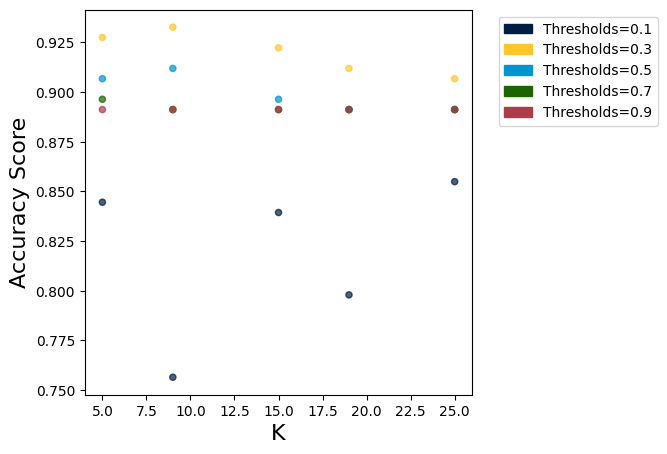

In [35]:
knn_results.scatter("K","Accuracy Score", group="Thresholds")

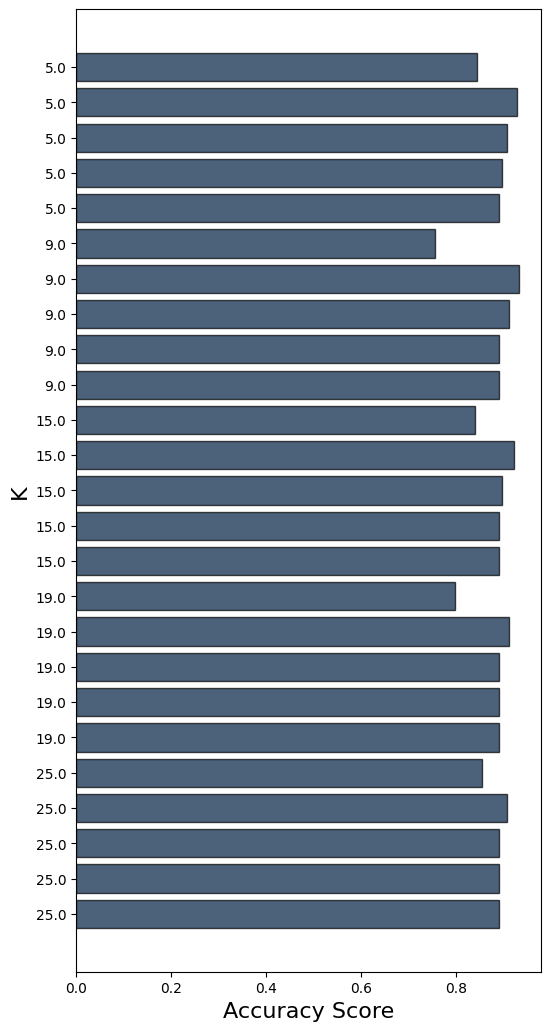

In [25]:
knn_results.barh("K","Accuracy Score")

**d)** Fit a Decision Tree model using `max_depth` = 2, 3, 4, and 5. Find the predicted scores for the test for each of these, and use a threshold score of 0.1, 0.3, 0.5, 0.7, and 0.9 to find the accuracy on the test for all of these models. You should end up with a Table that has every combination of max depth and threshold values, and the accuracy associated with that combination. Which model and threshold performed the best?

**Hint:** This should be very similar to part c except with a different model.

**e)** Suppose researchers are trying to predict low birthweight babies so that they can be better prepared for providing aid. Based on this information, which do you think would be more important to use as the performance metric: **precision** or **recall**?

**f)** Determine the best model and best threshold by doing the same process in parts c and d with the measure you determined in part e. What is the overall accuracy for that model and threshold?